In [1]:
!pip install pennylane
!pip install pennylane-qulacs

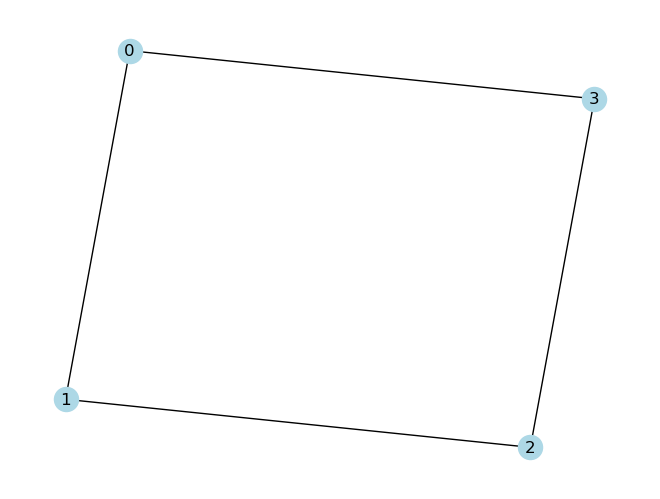

C:\Users\Usuario\anaconda3\Lib\site-packages\pennylane\devices\device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


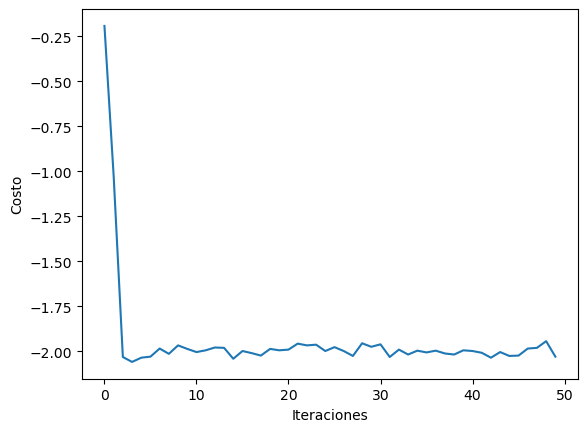

Parámetros óptimos: [1.21190639 2.35257739]
Valor final del costo: -2.029296875


In [2]:
from pennylane import qaoa
from pennylane import numpy as np
import pennylane as qml
from matplotlib import pyplot as plt
import networkx as nx

graph = nx.Graph([(0,1), (1,2), (2,3), (3,0)])
nx.draw(graph, with_labels=True, node_color='lightblue')
plt.show()

cost_h, mixer_h = qaoa.maxcut(graph)

n_wires = len(graph.nodes)
dev = qml.device('default.qubit', wires=n_wires, shots=1024)

@qml.qnode(dev)
def circuit(params):
    qaoa.cost_layer(params[0], cost_h)
    qaoa.mixer_layer(params[1], mixer_h)
    return qml.expval(cost_h)

np.random.seed(42)
params = np.random.uniform(0, np.pi, (2,))
opt = qml.GradientDescentOptimizer(stepsize=0.1)

steps = 50
costs = []
for _ in range(steps):
    params, cost = opt.step_and_cost(circuit, params)
    costs.append(cost)

plt.plot(costs)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

print("Parámetros óptimos:", params)
print("Valor final del costo:", cost)
